In [10]:
import numpy as np
import matplotlib.pyplot as plt
massa = 1
k = 1

n = int(input())

In [11]:
#constroi a matriz homogenea
a = []
for z in range(0,n):
    a.append(z)
print(a)


matriz_massa =[]
matriz_k = []
matriz = []
for z in range (0,n):
    matriz_massa.append([])
    matriz_k.append([])
    matriz.append([])
    for y in range(0,n):
        matriz_massa[z].append(massa)
        matriz_k[z].append(k)
        matriz[z].append(0)
print(matriz_massa)
print(matriz_k)
print(matriz)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 

In [12]:
#calcula os autovalores para n = 4 em um sistema homogeneo em que o a ultima massa está ligada a primeira.

a = []
for z in range(0,n):
    a.append(z)
print(a)


for i in range(0,len(a)):
    for j in range (0,len(a)):

        if i==(j%len(a)):
            matriz[i][j] = ((matriz_k[i][(j-1)%len(a)] + matriz_k[i][(j+1)%len(a)]) / matriz_massa[i][j])
        
        if i==((j-1)%len(a)):
            matriz[i][j] = -1*(matriz_k[i][j]) / (matriz_massa[i][j])
        
        if i==((j+1)%len(a)):
            matriz[i][j] = -1*(matriz_k[i][j]) / (matriz_massa[i][j])

print()
for p in matriz:
    print(p)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]

[2.0, -1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1.0]
[-1.0, 2.0, -1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [13]:
#constroi a matriz com defeito m2=5
a = []
for z in range(0,n):
    a.append(z)
#print(a)


matriz_massa =[]
matriz_k = []
matriz = []
for z in range (0,n):
    matriz_massa.append([])
    matriz_k.append([])
    matriz.append([])
    for y in range(0,n):
        matriz_k[z].append(k)
        matriz[z].append(0)

        if z == 1:
            matriz_massa[z].append(5)
        else:
            matriz_massa[z].append(massa)

#print(matriz_massa)
#print(matriz_k)
#print(matriz)


#calcula os autovalores para n = 4 em um sistema homogeneo em que o a ultima massa está ligada a primeira.

a = []
for z in range(0,n):
    a.append(z)
#print(a)


for i in range(0,len(a)):
    for j in range (0,len(a)):

        if i==(j%len(a)):
            matriz[i][j] = ((matriz_k[i][(j-1)%len(a)] + matriz_k[i][(j+1)%len(a)]) / matriz_massa[i][j])
        
        if i==((j-1)%len(a)):
            matriz[i][j] = -1*(matriz_k[i][j]) / (matriz_massa[i][j])
        
        if i==((j+1)%len(a)):
            matriz[i][j] = -1*(matriz_k[i][j]) / (matriz_massa[i][j])

print()
for p in matriz:
    print(p)


[2.0, -1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1.0]
[-0.2, 0.4, -0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, -1.0, 2.0, -1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, -1.0, 2.0, -1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

Autovalores: [-2.775771636111628e-16, 0.00365016191370801, 0.003946543143457161, 0.014602084122517353, 0.015770597371044384, 0.03285669954316741, 0.035425498542622946, 0.05840579415044227, 0.06283367774273763, 0.09122152264324752, 0.09788696740969288, 0.1312473529447648, 0.1404470282234974, 0.17839215274641018, 0.19034589506796107, 0.23252752564298254, 0.24738663991227286, 0.29348761756548025, 0.3113441489959699, 0.3610704371793223, 0.3819660112501048, 0.4350399300323329, 0.4589735144484208, 0.5151283272424457, 0.5420627451571783, 0.6010385181197414, 0.6309057881426221, 0.6924463423456175, 0.7251520205026213, 0.7890027765237091, 0.824429495415053, 0.890336026157886, 0.9283464100420088, 0.9960535466230809, 1.036492651796568, 1.1057440176755948, 1.1484414168698531, 1.218979292280534, 1.2637508946306428, 1.3353163354072632, 1.3819660112501073, 1.4542991634716942, 1.5026202256702952, 1.575460790844343, 1.6252373708285528, 1.6983251864105369, 1.749333532871393, 1.8224092404954881, 1.8744189

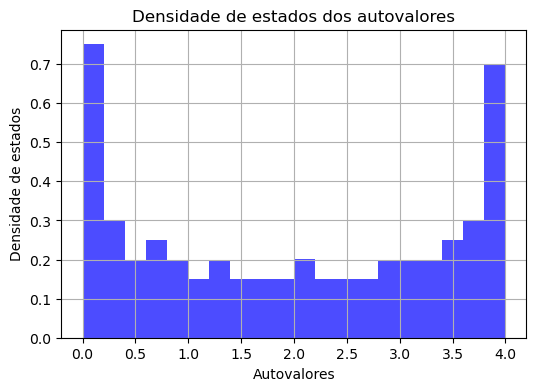

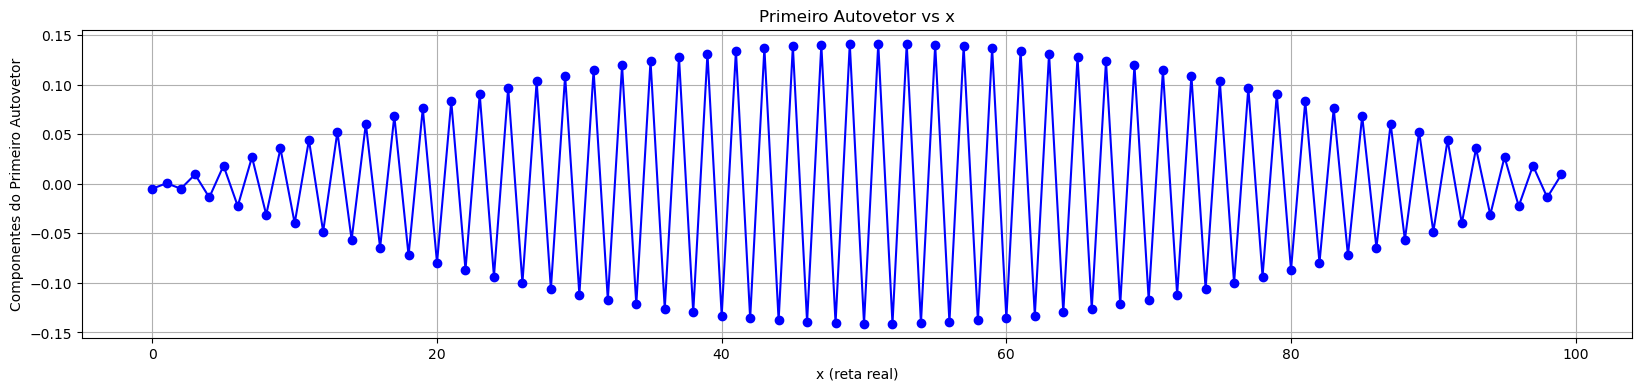

In [14]:
import matplotlib.pyplot as plt

# Calcula os autovalores da matriz
autovalores, autovetores  = np.linalg.eig(matriz)
avl = list(autovalores)
avl.sort()

avt = []
print("Autovalores:", avl)

print("Autovetores:")
for q in range(0,n):
    avt.append([])
    for p in range(0,n):
        avt[q].append(autovetores[q][p])

avt.sort()
for q in avt:
    print(q)


# Plota a densidade de estados (histograma dos autovalores)
plt.figure(figsize=(6,4))
plt.hist(avl, bins=20, density=True, alpha=0.7, color='blue')
plt.xlabel('Autovalores')
plt.ylabel('Densidade de estados')
plt.title('Densidade de estados dos autovalores')
plt.grid(True)
plt.show()



# Plota o primeiro autovetor em função de uma reta real x
x = np.arange(n)
plt.figure(figsize=(20,4))
plt.plot(x, autovetores[:,0], marker='o', linestyle='-', color='blue')
plt.xlabel('x (reta real)')
plt.ylabel('Componentes do Primeiro Autovetor')
plt.title('Primeiro Autovetor vs x')
plt.grid(True)
plt.show()